In [42]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set(rc={'figure.figsize':(20, 12)})

In [100]:
df= pd.read_excel("Data.xlsx")
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


## Steps of Data Processing:

-Split date of journey into (day, Month, Year)

-Total Stops Converted to Numbers

-Feature engineering (Total_Hops = Number of places routes) and Remove Route

-Remove Additional_information

-Split Arrival Time

-Split the Duration two Columns into (Hour, Minutes)

-Adding New Column (arrive_in_different_day) contains Yes or No

-Define outliers and duplication and remove them

-Remove empty rows



In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [21]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


## Split Date_of_Journey into (day, Month, Year)

In [101]:
df['Date_of_Journey']=pd.to_datetime(df.Date_of_Journey)

In [102]:
df['Journey_Year']=df.Date_of_Journey.dt.year
df['Journey_Month']=df.Date_of_Journey.dt.month
df['Journey_Day']=df.Date_of_Journey.dt.day
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Year,Journey_Month,Journey_Day
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019,3,24
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2019,1,5
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,2019,9,6
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,2019,12,5
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,2019,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,2019,9,4
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,2019,4,27
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,2019,4,27
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,2019,1,3


In [103]:
df.drop(columns='Date_of_Journey',inplace=True)

## Total Stops Converted to Numbers

In [104]:
def total_stops(x):

    x = str(x)
    x = x.strip()

    if len(x) == 8 :
        x1 = 0

    elif len(x) < 8 and  len(x) > 5  :
        x1 = x[0]

    else:
        x1 = np.nan

    return float(x1)

In [105]:
df['Total_Stops'] = df.Total_Stops.apply(total_stops)
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Year,Journey_Month,Journey_Day
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0.0,No info,3897,2019,3,24
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2.0,No info,7662,2019,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2.0,No info,13882,2019,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1.0,No info,6218,2019,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1.0,No info,13302,2019,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,0.0,No info,4107,2019,9,4
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,0.0,No info,4145,2019,4,27
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,0.0,No info,7229,2019,4,27
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,0.0,No info,12648,2019,1,3


## Feature engineering (Total_Hops = Number of places routes) and Remove Route

In [106]:
df['Total_Hops'] = df.Total_Stops.apply(lambda x: x+1)
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Year,Journey_Month,Journey_Day,Total_Hops
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0.0,No info,3897,2019,3,24,1.0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2.0,No info,7662,2019,1,5,3.0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2.0,No info,13882,2019,9,6,3.0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1.0,No info,6218,2019,12,5,2.0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1.0,No info,13302,2019,1,3,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,0.0,No info,4107,2019,9,4,1.0
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,0.0,No info,4145,2019,4,27,1.0
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,0.0,No info,7229,2019,4,27,1.0
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,0.0,No info,12648,2019,1,3,1.0


In [107]:
df.drop(columns='Route',inplace=True)

## Remove Additional_information

In [108]:
df.drop(columns='Additional_Info',inplace=True)
df

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_Year,Journey_Month,Journey_Day,Total_Hops
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,0.0,3897,2019,3,24,1.0
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2.0,7662,2019,1,5,3.0
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2.0,13882,2019,9,6,3.0
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1.0,6218,2019,12,5,2.0
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1.0,13302,2019,1,3,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,19:55,22:25,2h 30m,0.0,4107,2019,9,4,1.0
10679,Air India,Kolkata,Banglore,20:45,23:20,2h 35m,0.0,4145,2019,4,27,1.0
10680,Jet Airways,Banglore,Delhi,08:20,11:20,3h,0.0,7229,2019,4,27,1.0
10681,Vistara,Banglore,New Delhi,11:30,14:10,2h 40m,0.0,12648,2019,1,3,1.0


## Drop Empty Row

In [109]:
df.dropna(inplace=True)

### Note: the Empty Columns Consist of the most Valuable KPIs of the Dataset So it Can not be Imputed

## Split Arrival Time

In [110]:
def Arrival_Time_Day_Spliter(x):

    x = x.strip()
    
    if len(x) > 5:
        
        x = x.split(sep=" ")

        x1 = x[1]
       
    else:

        x1 = 0
        
    return x1

In [111]:
def Arrival_Time_Spliter(x):

    x = x.strip()
    
    if len(x) > 5:
        
        x = x.split(sep=" ")

        x1 = x[0]
       
    else:

        x1 = x
        
    return x1

In [112]:
def Arrival_Time_Month_Spliter(x):

    x = x.strip()
    
    if len(x) > 5:
        
        x = x.split(sep=" ")

        x1 = x[2]
       
    else:

        x1 = 0
        
    return x1

In [113]:
df['Arrival_Day']= df.Arrival_Time.apply(Arrival_Time_Day_Spliter)
df['Arrival_Month'] = df.Arrival_Time.apply(Arrival_Time_Month_Spliter)
df['Arrival_Time'] = df.Arrival_Time.apply(Arrival_Time_Spliter)
df

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_Year,Journey_Month,Journey_Day,Total_Hops,Arrival_Day,Arrival_Month
0,IndiGo,Banglore,New Delhi,22:20,01:10,2h 50m,0.0,3897,2019,3,24,1.0,22,Mar
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2.0,7662,2019,1,5,3.0,0,0
2,Jet Airways,Delhi,Cochin,09:25,04:25,19h,2.0,13882,2019,9,6,3.0,10,Jun
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1.0,6218,2019,12,5,2.0,0,0
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1.0,13302,2019,1,3,2.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,19:55,22:25,2h 30m,0.0,4107,2019,9,4,1.0,0,0
10679,Air India,Kolkata,Banglore,20:45,23:20,2h 35m,0.0,4145,2019,4,27,1.0,0,0
10680,Jet Airways,Banglore,Delhi,08:20,11:20,3h,0.0,7229,2019,4,27,1.0,0,0
10681,Vistara,Banglore,New Delhi,11:30,14:10,2h 40m,0.0,12648,2019,1,3,1.0,0,0


## Adding New Column (Arrive_in_Different_Day) contains (Yes or No)

In [114]:
df['Arrive_in_Different_Day'] = df.apply(lambda x: "Yes" if x['Journey_Day'] !=
                     x['Arrival_Day'] and x['Arrival_Day']
                     != 0 else "No", axis=1) 
df

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_Year,Journey_Month,Journey_Day,Total_Hops,Arrival_Day,Arrival_Month,Arrive_in_Different_Day
0,IndiGo,Banglore,New Delhi,22:20,01:10,2h 50m,0.0,3897,2019,3,24,1.0,22,Mar,Yes
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2.0,7662,2019,1,5,3.0,0,0,No
2,Jet Airways,Delhi,Cochin,09:25,04:25,19h,2.0,13882,2019,9,6,3.0,10,Jun,Yes
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1.0,6218,2019,12,5,2.0,0,0,No
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1.0,13302,2019,1,3,2.0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,19:55,22:25,2h 30m,0.0,4107,2019,9,4,1.0,0,0,No
10679,Air India,Kolkata,Banglore,20:45,23:20,2h 35m,0.0,4145,2019,4,27,1.0,0,0,No
10680,Jet Airways,Banglore,Delhi,08:20,11:20,3h,0.0,7229,2019,4,27,1.0,0,0,No
10681,Vistara,Banglore,New Delhi,11:30,14:10,2h 40m,0.0,12648,2019,1,3,1.0,0,0,No


In [115]:
df.drop(columns=['Arrival_Day','Arrival_Month'], axis=1, inplace=True)
df

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_Year,Journey_Month,Journey_Day,Total_Hops,Arrive_in_Different_Day
0,IndiGo,Banglore,New Delhi,22:20,01:10,2h 50m,0.0,3897,2019,3,24,1.0,Yes
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2.0,7662,2019,1,5,3.0,No
2,Jet Airways,Delhi,Cochin,09:25,04:25,19h,2.0,13882,2019,9,6,3.0,Yes
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1.0,6218,2019,12,5,2.0,No
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1.0,13302,2019,1,3,2.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,19:55,22:25,2h 30m,0.0,4107,2019,9,4,1.0,No
10679,Air India,Kolkata,Banglore,20:45,23:20,2h 35m,0.0,4145,2019,4,27,1.0,No
10680,Jet Airways,Banglore,Delhi,08:20,11:20,3h,0.0,7229,2019,4,27,1.0,No
10681,Vistara,Banglore,New Delhi,11:30,14:10,2h 40m,0.0,12648,2019,1,3,1.0,No


## Split the Duration two Columns into (Hour, Minutes)

In [116]:
def Split_Duration_hour(x):

   if len(x) >= 5:

      x =  x.split(sep=" ")
   
      x1 = x[0]
      x1 = x1.strip("h") 
         

   else:
      

      x1 = x.strip("h")

      if x1.endswith("m") == True:

         x1 = x1.strip("m")
         x1 = int(x1)/60

   
   
   return float(x1)
  

In [117]:
def Split_Duration_minute(x):
   
   if len(x) >= 5:

      x =  x.split(sep=" ")
   
      x1 = x[1]
      
      x1 = x1.strip("m")  

   else:

      x1 = 0
   
   return float(x1)
  

In [118]:
df['Duration_Hour']= df.Duration.apply(Split_Duration_hour)
df['Duration_Minute']= df.Duration.apply(Split_Duration_minute)
df

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_Year,Journey_Month,Journey_Day,Total_Hops,Arrive_in_Different_Day,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,22:20,01:10,2h 50m,0.0,3897,2019,3,24,1.0,Yes,2.0,50.0
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2.0,7662,2019,1,5,3.0,No,7.0,25.0
2,Jet Airways,Delhi,Cochin,09:25,04:25,19h,2.0,13882,2019,9,6,3.0,Yes,19.0,0.0
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1.0,6218,2019,12,5,2.0,No,5.0,25.0
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1.0,13302,2019,1,3,2.0,No,4.0,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,19:55,22:25,2h 30m,0.0,4107,2019,9,4,1.0,No,2.0,30.0
10679,Air India,Kolkata,Banglore,20:45,23:20,2h 35m,0.0,4145,2019,4,27,1.0,No,2.0,35.0
10680,Jet Airways,Banglore,Delhi,08:20,11:20,3h,0.0,7229,2019,4,27,1.0,No,3.0,0.0
10681,Vistara,Banglore,New Delhi,11:30,14:10,2h 40m,0.0,12648,2019,1,3,1.0,No,2.0,40.0


In [119]:
df.drop(columns=['Duration','Dep_Time','Arrival_Time'], axis=1, inplace=True)
df

,Airline,Source,Destination,Total_Stops,Price,Journey_Year,Journey_Month,Journey_Day,Total_Hops,Arrive_in_Different_Day,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,0.0,3897,2019,3,24,1.0,Yes,2.0,50.0
1,Air India,Kolkata,Banglore,2.0,7662,2019,1,5,3.0,No,7.0,25.0
2,Jet Airways,Delhi,Cochin,2.0,13882,2019,9,6,3.0,Yes,19.0,0.0
3,IndiGo,Kolkata,Banglore,1.0,6218,2019,12,5,2.0,No,5.0,25.0
4,IndiGo,Banglore,New Delhi,1.0,13302,2019,1,3,2.0,No,4.0,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0.0,4107,2019,9,4,1.0,No,2.0,30.0
10679,Air India,Kolkata,Banglore,0.0,4145,2019,4,27,1.0,No,2.0,35.0
10680,Jet Airways,Banglore,Delhi,0.0,7229,2019,4,27,1.0,No,3.0,0.0
10681,Vistara,Banglore,New Delhi,0.0,12648,2019,1,3,1.0,No,2.0,40.0


## Define outliers and duplication and remove them

<AxesSubplot:xlabel='Price'>

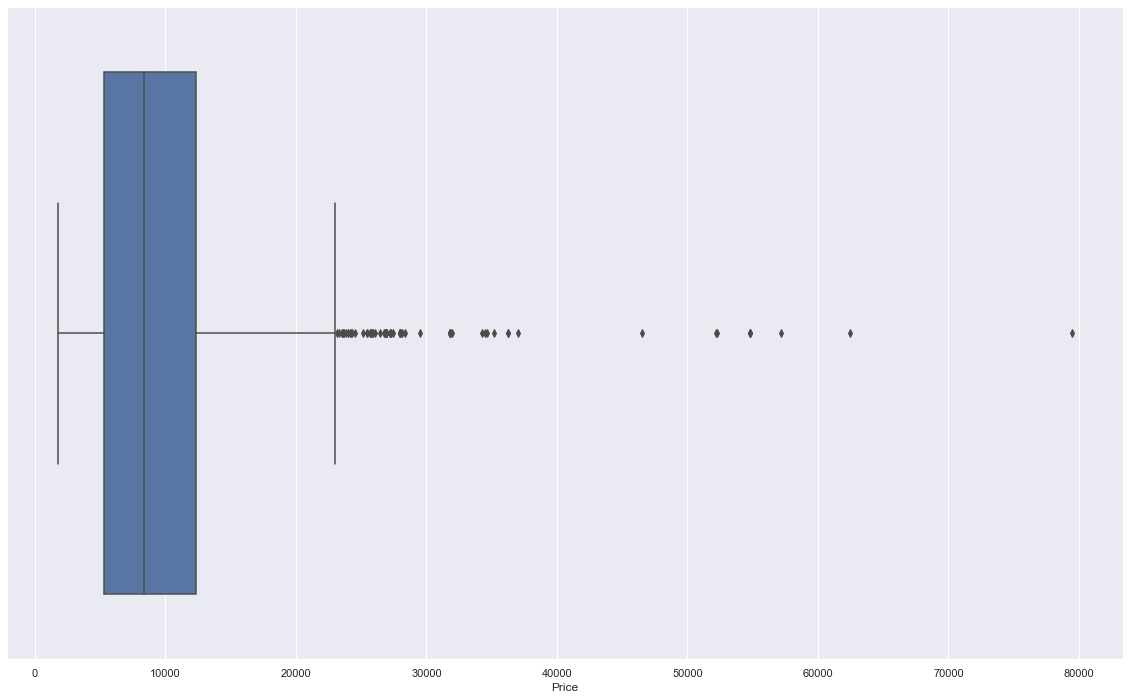

In [120]:
sns.boxplot(data=df,x=df.Price)

## Note: There is Outlier in Price but maybe normal due to the difference in Airline prices and also because there are other features that demonstrate cost od flights

In [121]:
df.drop_duplicates(inplace=True)
df

,Airline,Source,Destination,Total_Stops,Price,Journey_Year,Journey_Month,Journey_Day,Total_Hops,Arrive_in_Different_Day,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,0.0,3897,2019,3,24,1.0,Yes,2.0,50.0
1,Air India,Kolkata,Banglore,2.0,7662,2019,1,5,3.0,No,7.0,25.0
2,Jet Airways,Delhi,Cochin,2.0,13882,2019,9,6,3.0,Yes,19.0,0.0
3,IndiGo,Kolkata,Banglore,1.0,6218,2019,12,5,2.0,No,5.0,25.0
4,IndiGo,Banglore,New Delhi,1.0,13302,2019,1,3,2.0,No,4.0,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10677,SpiceJet,Banglore,Delhi,0.0,3257,2019,5,21,1.0,No,2.0,40.0
10678,Air Asia,Kolkata,Banglore,0.0,4107,2019,9,4,1.0,No,2.0,30.0
10679,Air India,Kolkata,Banglore,0.0,4145,2019,4,27,1.0,No,2.0,35.0
10681,Vistara,Banglore,New Delhi,0.0,12648,2019,1,3,1.0,No,2.0,40.0


# EDA

-the most used airlines

-the most monnth that people used to travel in it

-The most Total_Hops Flight to the Overall Flights

-How Much Flights Arrived in Differnet Day

## The most used airlines

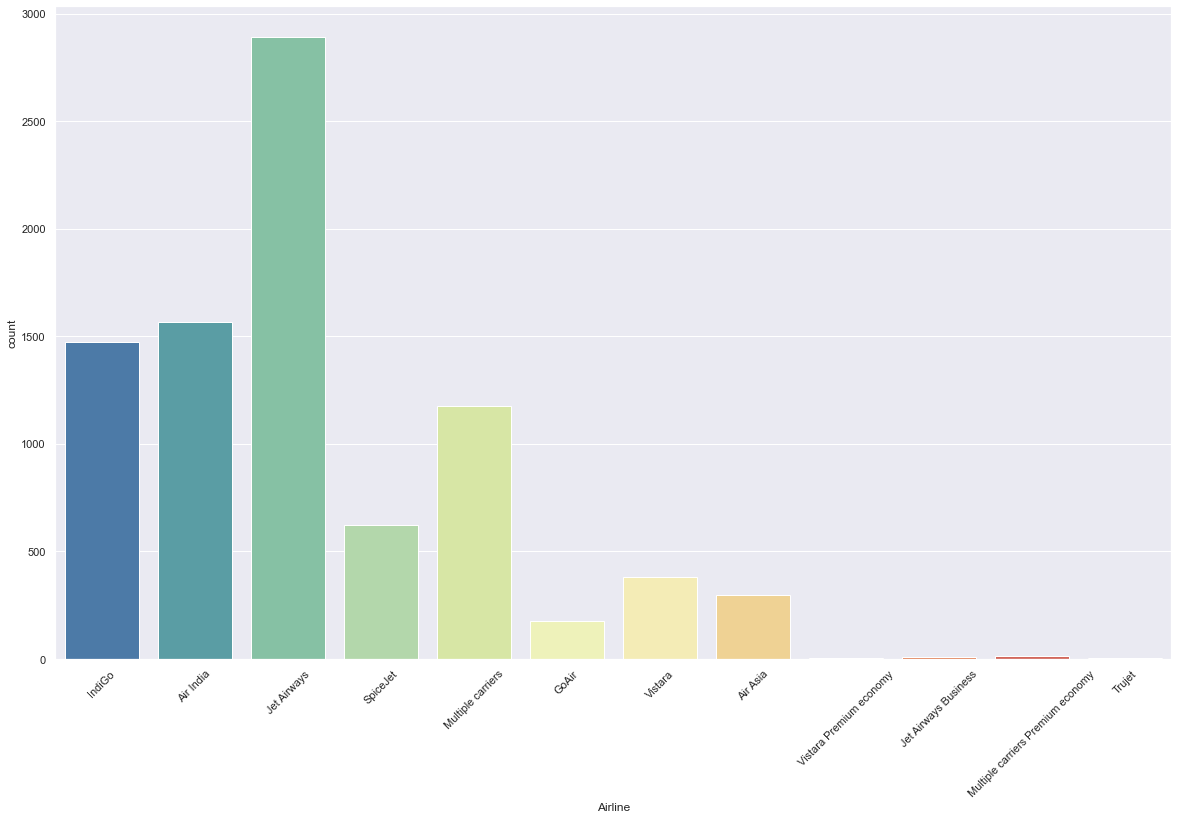

In [81]:
import matplotlib.pyplot as plt

sns.countplot(data=df, x=df.Airline, palette='Spectral_r')


plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.show()

## The most Months that people used to travel in it

<AxesSubplot:xlabel='Journey_Month', ylabel='count'>

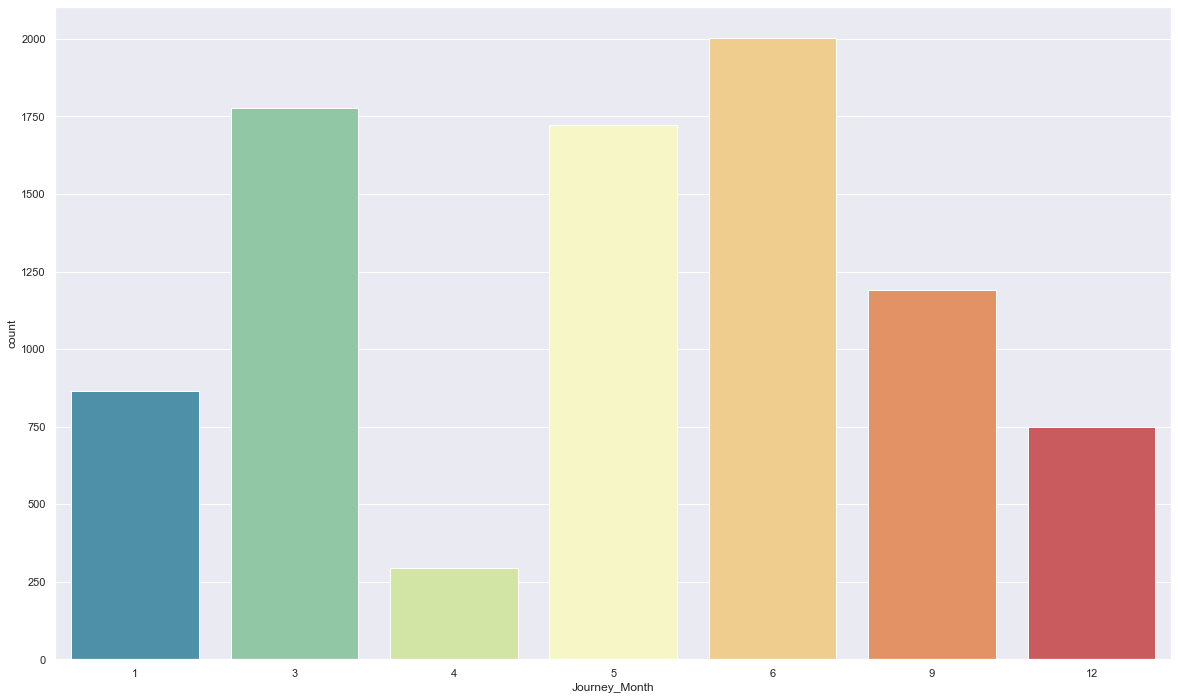

In [82]:
sns.countplot(data=df, x=df.Journey_Month, palette='Spectral_r')

### The most Fevorable Months to Travel is 3, 5 and 6

## The most Total_Hops Flight to the Overall Flights

<AxesSubplot:xlabel='Total_Hops', ylabel='count'>

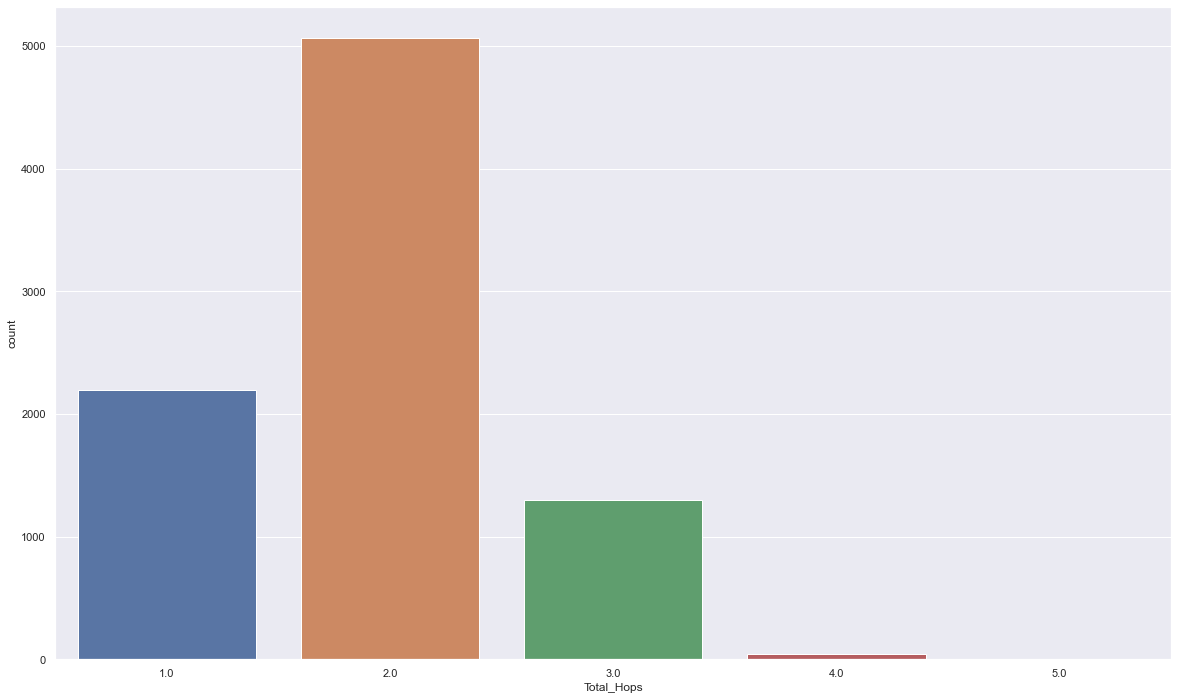

In [85]:
sns.countplot(data=df,x=df.Total_Hops)

### Most Flights Have Maximum of Two Hops before Reaching Destination

## How Much Flights Arrived in Differnet Day

<AxesSubplot:xlabel='Arrive_in_Different_Day', ylabel='count'>

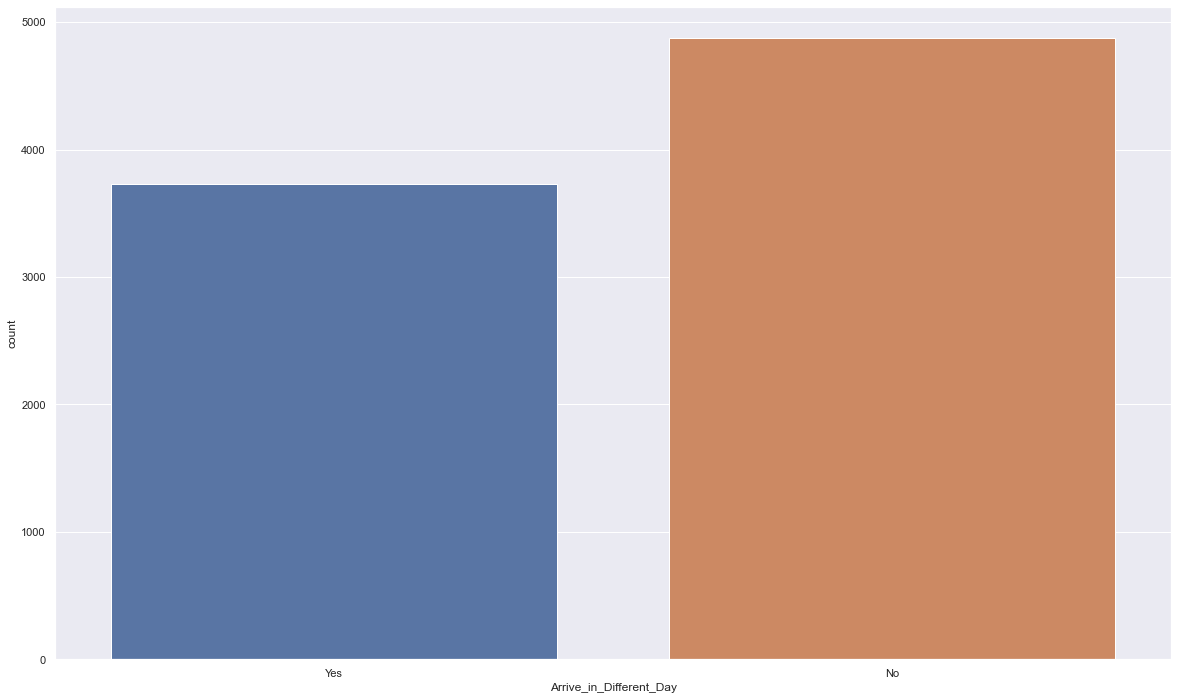

In [83]:
sns.countplot(data=df,x=df.Arrive_in_Different_Day)

## Noticed that the Most Flights Lands in Different day of Taking Off

# Data Preprocessing 

Steps of Data Preprocessing:

-Label encoding (Airline, Source, Destination)

-Split train_test

-Data Scaling

## Label Encoding

In [122]:
#Label encoding Using Map for Each Categorical Value

Source_map = {                             
    'Banglore':0, 
    'Kolkata':1, 
    'Delhi':2, 
    'Chennai':3, 
    'Mumbai':4
}

Destination_map = {
    'New Delhi':0, 
    'Banglore':1, 
    'Cochin':2, 
    'Kolkata':3, 
    'Delhi':4, 
    'Hyderabad':5
}

Airline_map = {                             
    'IndiGo':0,
    'Air India':1,
    'Jet Airways':2, 
    'SpiceJet':3,
    'Multiple carriers':4,
    'GoAir':5, 
    'Vistara':6, 
    'Air Asia':7,
    'Vistara Premium economy':8,
    'Jet Airways Business':9,
    'Multiple carriers Premium economy':10, 
    'Trujet':11
}

Arrive_in_Differnet_Day_map = {                             
    'No':0, 
    'Yes':1 
}


In [123]:
df['Source'] = df['Source'].map(Source_map)

df['Destination'] = df['Destination'].map(Destination_map)

df['Airline'] = df['Airline'].map(Airline_map)

df['Arrive_in_Different_Day'] = df['Arrive_in_Different_Day'].map(Arrive_in_Differnet_Day_map)

df


,Airline,Source,Destination,Total_Stops,Price,Journey_Year,Journey_Month,Journey_Day,Total_Hops,Arrive_in_Different_Day,Duration_Hour,Duration_Minute
0,0,0,0,0.0,3897,2019,3,24,1.0,1,2.0,50.0
1,1,1,1,2.0,7662,2019,1,5,3.0,0,7.0,25.0
2,2,2,2,2.0,13882,2019,9,6,3.0,1,19.0,0.0
3,0,1,1,1.0,6218,2019,12,5,2.0,0,5.0,25.0
4,0,0,0,1.0,13302,2019,1,3,2.0,0,4.0,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10677,3,0,4,0.0,3257,2019,5,21,1.0,0,2.0,40.0
10678,7,1,1,0.0,4107,2019,9,4,1.0,0,2.0,30.0
10679,1,1,1,0.0,4145,2019,4,27,1.0,0,2.0,35.0
10681,6,0,0,0.0,12648,2019,1,3,1.0,0,2.0,40.0


## Train_Test Split

In [124]:
y = df['Price']                                #Put the Target in Y Variable
x = df.drop('Price', axis=1)                   #Put All Features in x Variable (Excluding the Target)

In [125]:
from sklearn.model_selection import train_test_split              #Split the Data into Train and Test with No rendom Choice of Data each time

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

## Data Normalization

In [126]:
from sklearn.preprocessing import PowerTransformer             # Normalize the Values So no Feature effect the other

Scalar = PowerTransformer()

Scalar.fit_transform(x_train)

array([[-0.5851991 , -0.4118125 , -0.72757762, ...,  1.16925179,
         1.11814186,  1.468739  ],
       [ 1.04141781,  0.5476954 ,  0.17279302, ..., -0.85524778,
         0.74931306, -1.88394655],
       [ 1.40712015,  0.5476954 ,  0.17279302, ..., -0.85524778,
         0.14397409, -1.88394655],
       ...,
       [ 0.0933465 , -0.4118125 , -0.72757762, ..., -0.85524778,
         0.14397409,  0.20435268],
       [-1.61076273,  0.5476954 ,  0.17279302, ..., -0.85524778,
        -0.67924487,  0.4730798 ],
       [ 0.0933465 ,  0.5476954 ,  0.17279302, ..., -0.85524778,
         0.57326945,  0.20435268]])

In [127]:
from sklearn.preprocessing import PowerTransformer                     # Normalize the Values So no Feature effect the other
   
Scalar = PowerTransformer()

Scalar.fit_transform(x_test)

array([[-1.6136263 , -1.61390817,  1.48301007, ..., -0.84031431,
        -1.24186359,  1.22812272],
       [-0.59467683,  0.53239697,  0.1930285 , ..., -0.84031431,
         0.47802228, -0.71164006],
       [ 0.08291024, -0.42506007, -0.6992942 , ...,  1.19003091,
         0.00973521,  0.71998947],
       ...,
       [ 0.08291024, -0.42506007, -0.6992942 , ..., -0.84031431,
         0.00973521, -0.10152319],
       [ 0.08291024,  0.53239697,  0.1930285 , ...,  1.19003091,
         1.87883583,  0.18212844],
       [ 1.03370453,  0.53239697,  0.1930285 , ..., -0.84031431,
         0.37383009,  0.97724561]])

# ML Models

## Linear Regression

In [128]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

pred = model.predict(x_test)

model.score(x_test,y_test)

0.42855221790815123

## KNN Regressor

In [129]:
from sklearn.neighbors import KNeighborsRegressor

neigh = KNeighborsRegressor(n_neighbors=3)
neigh.fit(x_train, y_train)

neigh.score(x_test,y_test)

0.5323953767779088

## Decision Tree Regressor

In [130]:
from sklearn.tree import DecisionTreeRegressor

Tree = DecisionTreeRegressor(max_depth=10, max_leaf_nodes=20)

Tree.fit(x_train, y_train)

r2_train = Tree.score(x_train, y_train)
r2_test = Tree.score(x_test, y_test)

print(f"R2 Score of Decision Tree Training: {r2_train}")
print(f"R2 Score of Decision Tree Test: {r2_test}")

R2 Score of Decision Tree Training: 0.7109837059738984
R2 Score of Decision Tree Test: 0.6958606222096448


## Random Forest Regressor

In [131]:
from sklearn.model_selection import GridSearchCV

Desicion_Tree = DecisionTreeRegressor()
parameters = {
    'max_depth': [5, 10, 15, 20, 25],
    'max_leaf_nodes': [10, 15, 20, 25, 30]
}

grid = GridSearchCV(Desicion_Tree, parameters)

In [132]:
grid.fit(x_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [5, 10, 15, 20, 25],
                         'max_leaf_nodes': [10, 15, 20, 25, 30]})

In [133]:
r2_train = grid.score(x_train, y_train)
r2_test = grid.score(x_test, y_test)

print(f"R2 Score of Decision Tree Training: {r2_train}")
print(f"R2 Score of Decision Tree Test: {r2_test}")

R2 Score of Decision Tree Training: 0.7368716160315363
R2 Score of Decision Tree Test: 0.7103672930133849


In [134]:
grid.best_params_

{'max_depth': 20, 'max_leaf_nodes': 30}

## XGBoost Regressor

In [135]:
from xgboost import XGBRegressor

XGB = XGBRegressor(n_estimators=8, max_depth=7, max_leaves=20)

XGB.fit(x_train, y_train)

r2_train = XGB.score(x_train, y_train)
r2_test = XGB.score(x_test, y_test)

print(f"R2 Score of XGBoost Training: {r2_train}")
print(f"R2 Score of XGBoost Test: {r2_test}")

R2 Score of XGBoost Training: 0.7875793702954526
R2 Score of XGBoost Test: 0.7697545268559324


# Deployment

In [143]:
import joblib

joblib.dump(XGB, 'Final_Model.h5')

['Final_Model.h5']